In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import itertools
from scipy import stats

%matplotlib inline

In [36]:
# Cargamos los datos
df = pd.read_csv(r'C:\Users\elosasso\OneDrive - Universidad Torcuato Di Tella\Machine Learning\TP\data\train.csv')

In [37]:
# Convierto la variable target a categorica
df['TARGET'] = pd.Categorical(df['TARGET'])  

In [38]:
# Veo estructura del DataFrame
df.shape

(33008, 312)

In [39]:
# Descripción de estadísticos principales
df.describe()

,ID,nac,age,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,33008.000000,32952.000000,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,...,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,33008.000000,3.300800e+04
mean,38021.988276,2.604091,33.513845,71.087825,75.453705,123.051734,4.024422,6.492727,0.539869,0.678220,...,0.105756,3.965876,1.026191,6.806853,5.097875,19.128384,0.852542,53.664686,39.025498,1.164073e+05
std,21952.672176,8.476165,12.926184,1069.780838,358.708040,563.844568,91.438786,145.820922,23.891157,29.542351,...,19.213893,260.911669,96.639121,492.371097,350.906039,1122.958313,100.391557,3019.815110,2004.888012,1.660235e+05
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,18988.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.729393e+04
50%,37897.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057202e+05
75%,57152.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.177425e+05
max,76020.000000,223.000000,105.000000,76500.000000,12888.030000,15182.460000,5122.290000,11073.570000,1800.000000,3000.000000,...,3490.800000,24745.410000,11473.050000,63317.190000,42767.160000,126006.180000,17646.420000,361472.280000,231202.140000,1.113990e+07


### Distribución de la variable target

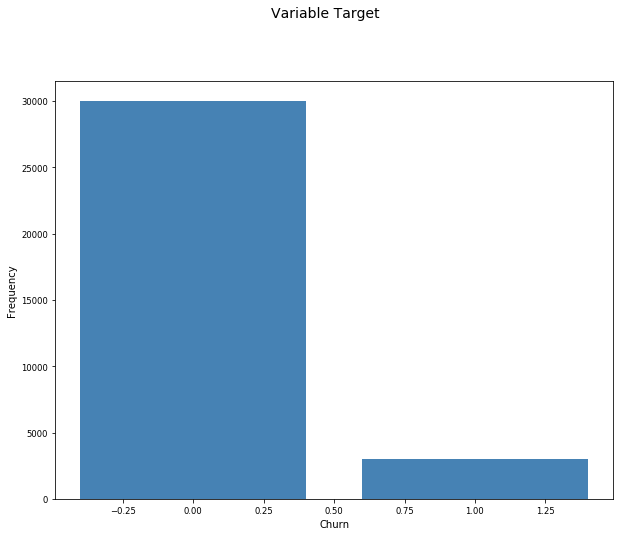

In [40]:

fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("Variable Target", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Churn")
ax.set_ylabel("Frequency") 
w_q = df['TARGET'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')

### Proporción de churn/ no churn

In [41]:
(df['TARGET'].value_counts()/df.shape[0])*100

0    90.887058
1     9.112942
Name: TARGET, dtype: float64

El dataframe esta claramente desbalanceado, siendo la clase negativa (no hizo churn) la clase mayoritaria con un aproximado 91%, lo que deja los casos de churn positivo en un 9% del total del dataset. 

### Distribución de la edad

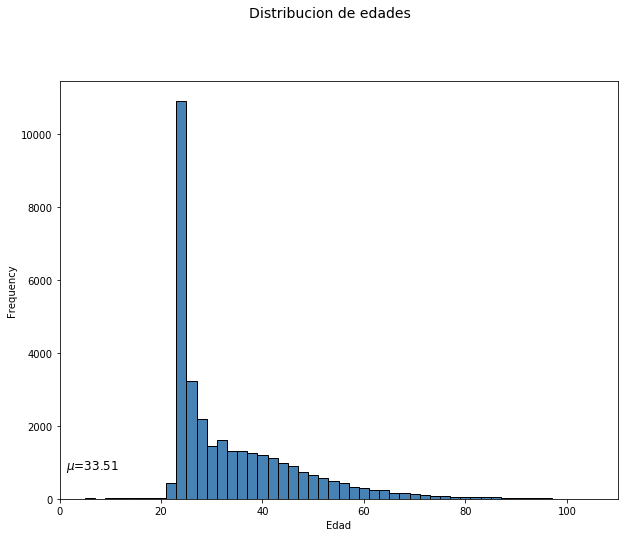

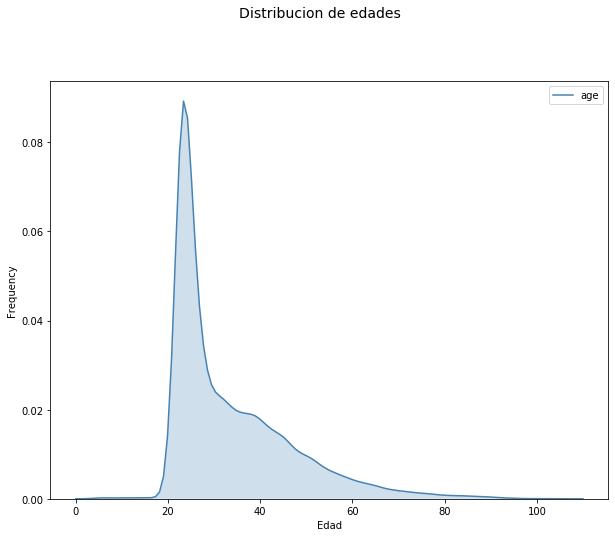

In [42]:
# Histogram
fig = plt.figure(figsize = (10,8))
title = fig.suptitle("Distribucion de edades", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Edad")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['age'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['age'], color='steelblue', bins=50,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("Distribucion de edades", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Edad")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['age'], ax=ax1, shade=True, color='steelblue')

### Distribucion de variables *'varx'*

Existen tres variables que desconocemos a qué hacen referencia o los valores que representan, por eso miramos la distribución de estas para entender un poco cómo se encuentra compuesta

Text(0.5, 51.0, 'var38')

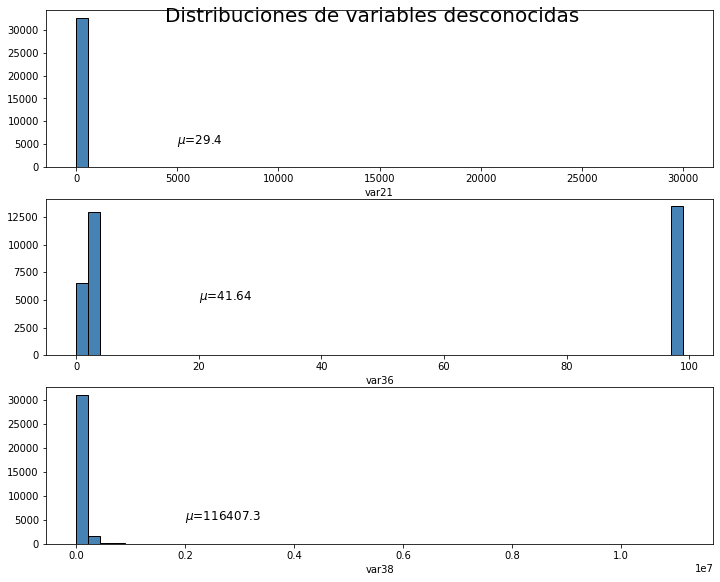

In [43]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))
plt.tight_layout() 

# Setear titulo
plt.suptitle('Distribuciones de variables desconocidas', fontsize = 20)

# Var21
ax[0].hist(df['var21'], color = 'steelblue', bins = 50, edgecolor = 'black', linewidth = 1)   # Creo el histograma
ax[0].text(5000, 5000, r'$\mu$='+str(round(df['var21'].mean(),2)), 
         fontsize=12)                                                                         # Calculo e imprimo la media en el grafico
ax[0].set_xlabel('var21')                                                                     # Cambio el nombre del eje x para que se 
                                                                                              # de que variable se esta hablando

# Var 36
ax[1].hist(df['var36'], color = 'steelblue', bins = 50, edgecolor = 'black', linewidth = 1)
ax[1].text(20, 5000, r'$\mu$='+str(round(df['var36'].mean(),2)), 
         fontsize=12)
ax[1].set_xlabel('var36')

# Var 38
ax[2].hist(df['var38'], color = 'steelblue', bins = 50, edgecolor = 'black', linewidth = 1)
ax[2].text(2000000, 5000, r'$\mu$='+str(round(df['var38'].mean(),2)), 
         fontsize=12)
ax[2].set_xlabel('var38')

Es muy dificil tratar de graficar la distribución para todas las variables, por eso se separan según aparecen clasificadas en el archivo 'levantadatos.R':
* *'imp'* y *'saldo'* como variables continuas
* *'num'* como variable continua
* *'in'* como variable categorica
* *'delta'* como variable con variacion en el tiempo


In [44]:
imp_cols   = [x for x in df.columns if 'imp_' in x and 'delta_' not in x]      # Guardo las columnas que tienen el prefijo 'imp'
saldo_cols = [x for x in df.columns if 'saldo' in x and 'delta_' not in x]     # Guardo las columnas que tienen el prefijo 'saldo'
num_cols   = [x for x in df.columns if 'num' in x and 'delta_' not in x]       # Guardo las columnas que tienen el prefijo 'num'
in_columns = [x for x in df.columns if 'in' in x and ('delta_' not in x and 'num' not in x and 'imp' not in x)]       # Guardo las columnas que tienen el prefijo 'num'
delta_columns = [x for x in df.columns if 'delta' in x ]

## Distribución de las variables de tipo *'importe (imp)'*

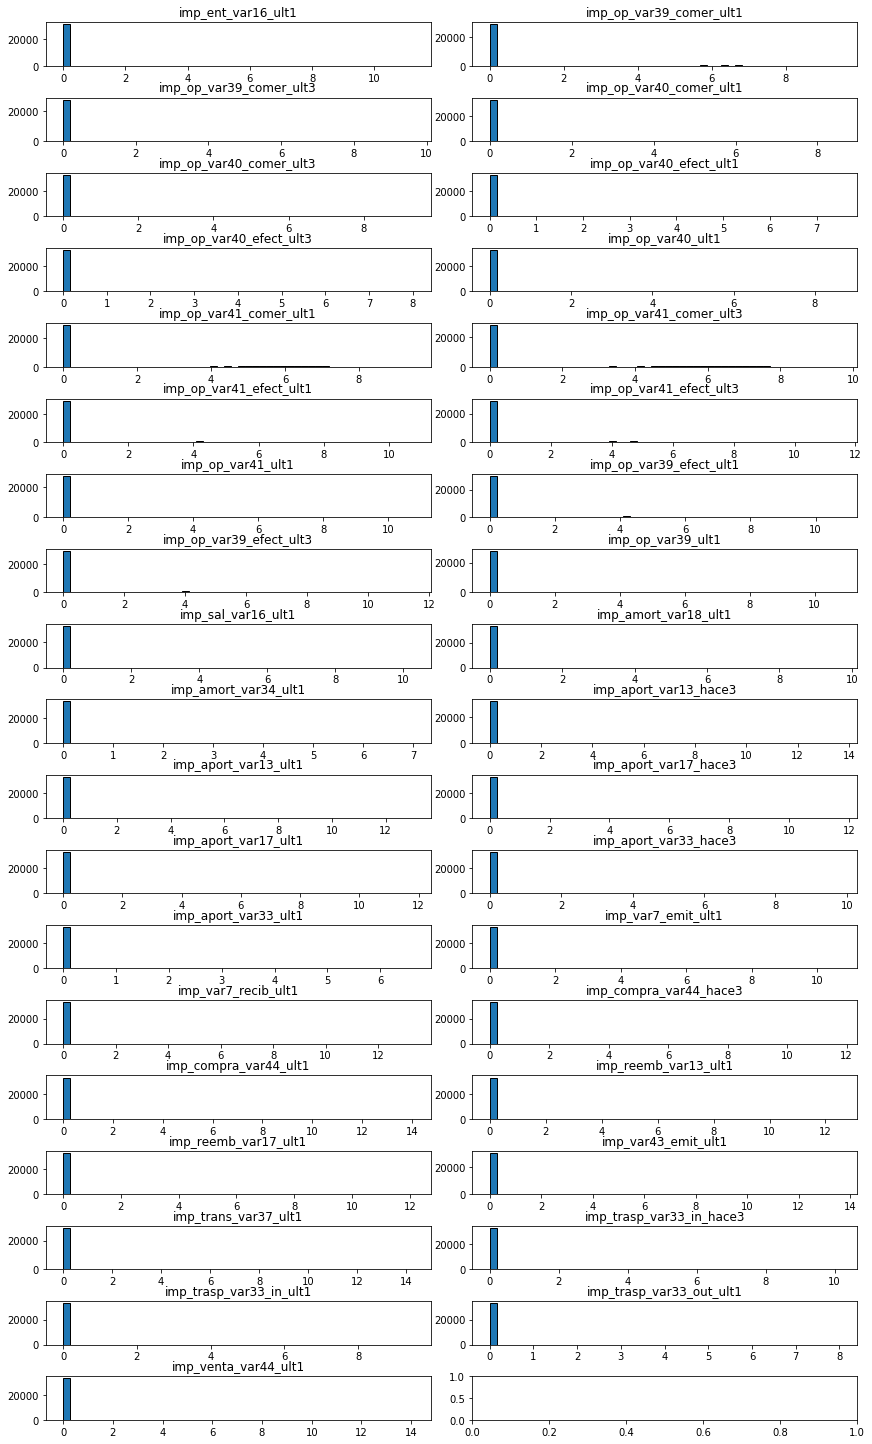

In [45]:
axes_index = [[x,y] for x,y in itertools.product(range(19), range(2))]                              # Creo un vector para guardar las posiciones en la matriz de ejes mas abajo
fig, axes = plt.subplots(nrows=19, ncols=2, figsize = (12,20))                                      # Creo un subplot con la cantidad de variables de tipo imp
plt.tight_layout()                                                                                  # Para que se encuentren distribuidos de forma pareja
for i in range(0,len(imp_cols)):
    axes[axes_index[i][0],axes_index[i][1]].hist(np.log(df[imp_cols[i]] + 1 - min(df[imp_cols[i]])), 
                                                 bins = 50, edgecolor = 'black', 
                                                 linewidth = 1.0)
    axes[axes_index[i][0],axes_index[i][1]].set_title(imp_cols[i])

## Distribución de las variables de tipo *'saldo (saldo)'*

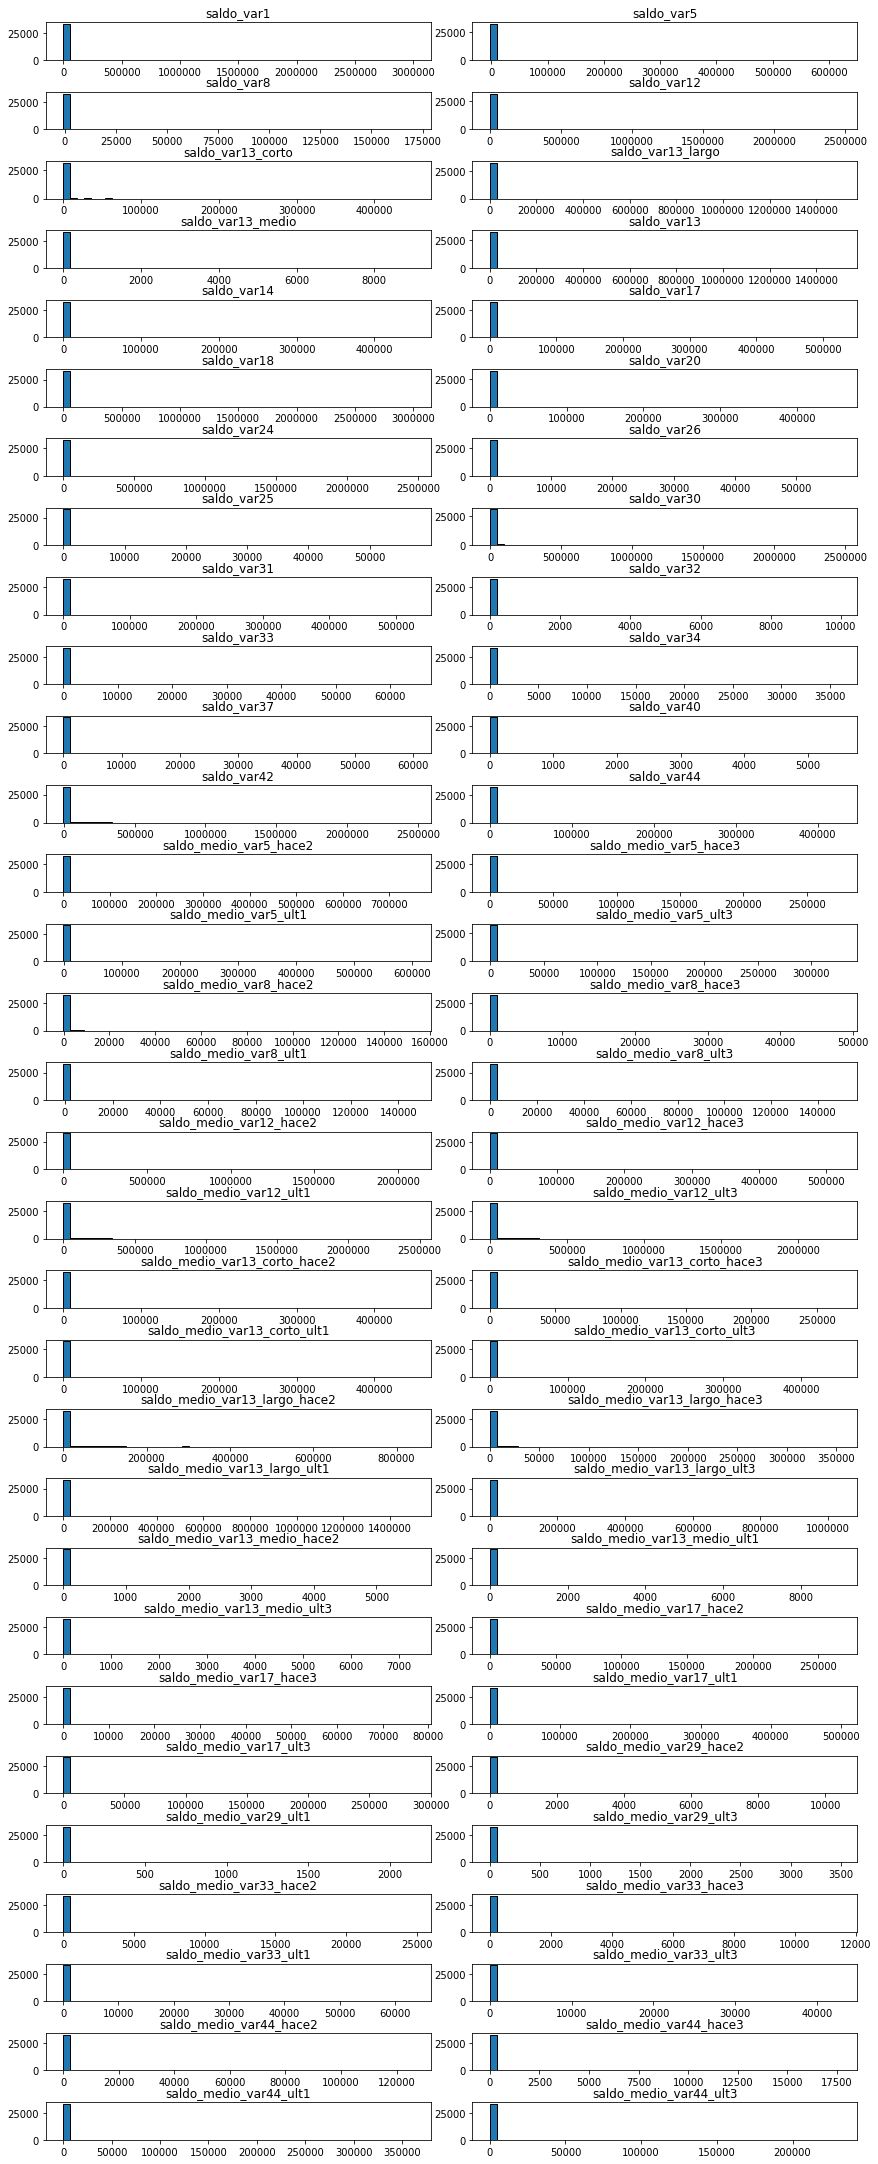

In [46]:
axes_index = [[x,y] for x,y in itertools.product(range(31), range(2))]                              # Creo un vector para guardar las posiciones en la matriz de ejes mas abajo
fig, axes = plt.subplots(nrows=31, ncols=2, figsize = (12,30))                                      # Creo un subplot con la cantidad de variables de tipo imp
plt.tight_layout()                                                                                  # Para que se encuentren distribuidos de forma pareja
for i in range(0,len(saldo_cols)):
    axes[axes_index[i][0],axes_index[i][1]].hist(df[saldo_cols[i]], 
                                                 bins = 50, edgecolor = 'black', 
                                                 linewidth = 1.0)
    axes[axes_index[i][0],axes_index[i][1]].set_title(saldo_cols[i])

## Distribución de las variables de tipo *'ind'*

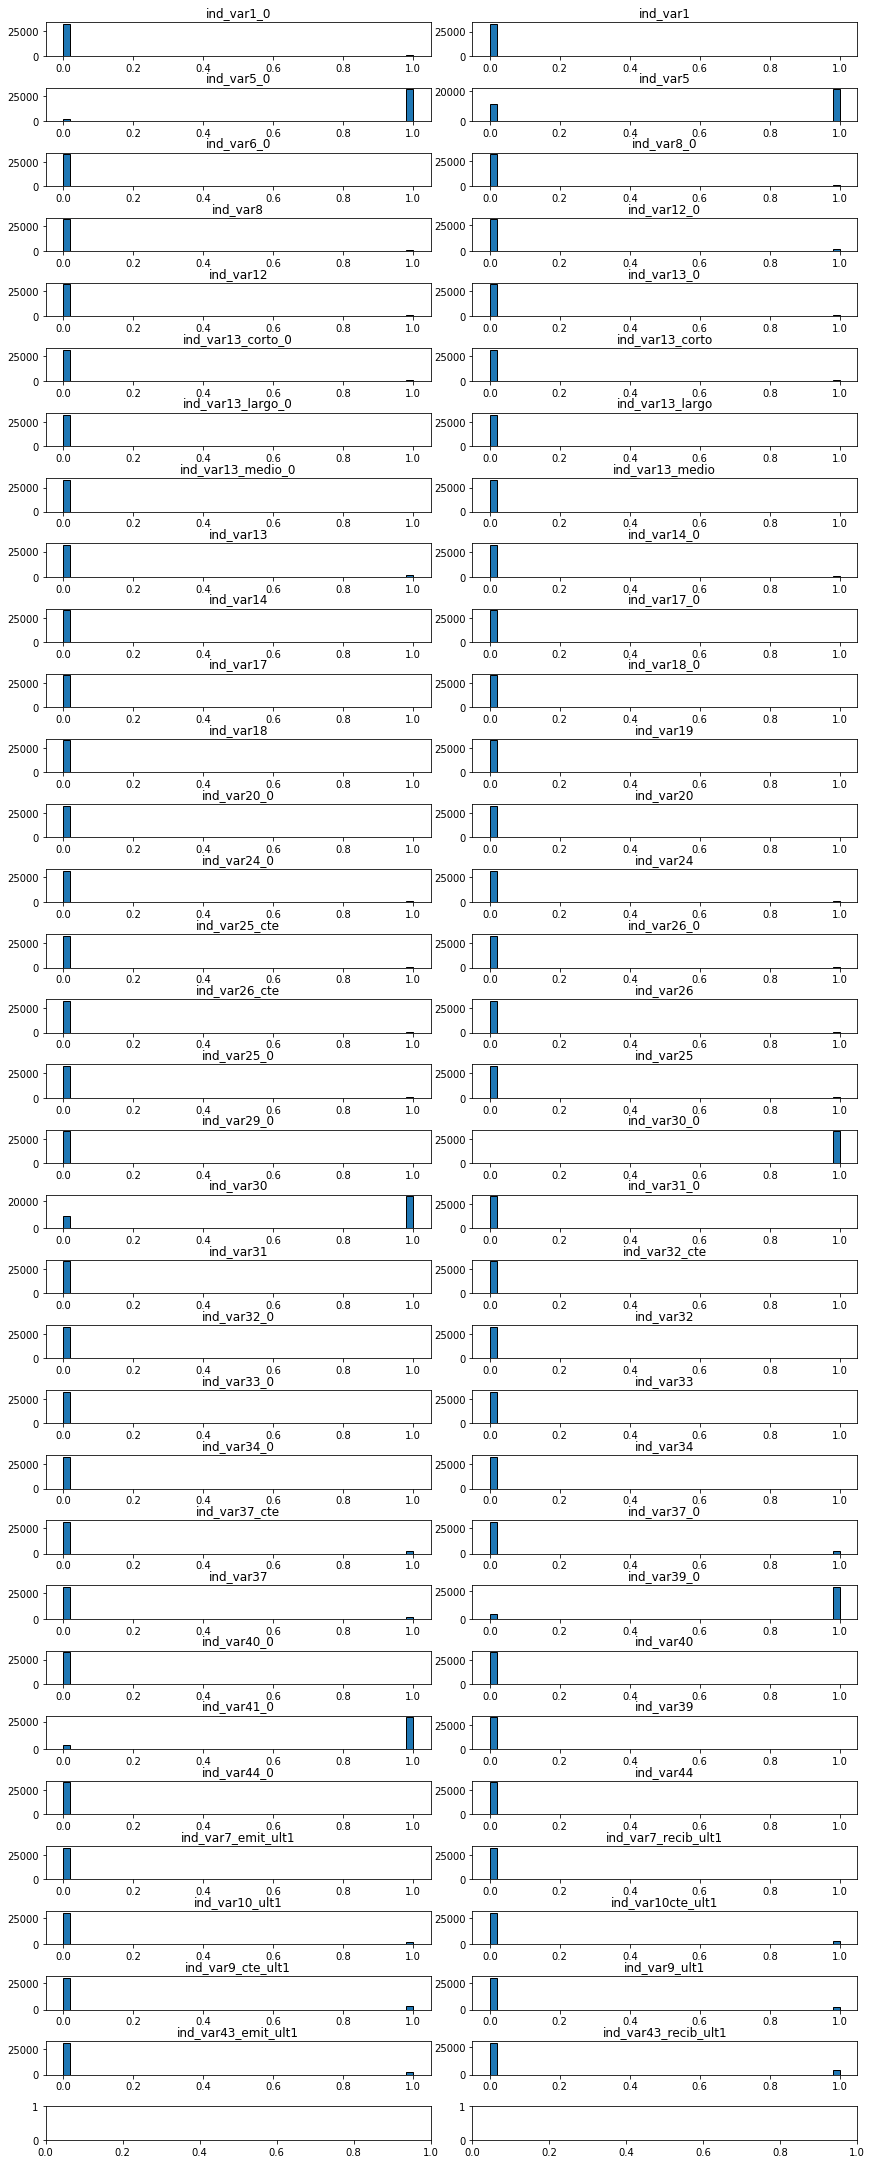

In [47]:
axes_index = [[x,y] for x,y in itertools.product(range(33), range(2))]                              # Creo un vector para guardar las posiciones en la matriz de ejes mas abajo
fig, axes = plt.subplots(nrows=33, ncols=2, figsize = (12,30))                                      # Creo un subplot con la cantidad de variables de tipo imp
plt.tight_layout()                                                                                  # Para que se encuentren distribuidos de forma pareja
for i in range(0,len(in_columns)):
    axes[axes_index[i][0],axes_index[i][1]].hist(df[in_columns[i]], 
                                                 bins = 50, edgecolor = 'black', 
                                                 linewidth = 1.0)
    axes[axes_index[i][0],axes_index[i][1]].set_title(in_columns[i])

Evidentemente se trata de variables categóricas o booleanas (1/0) por lo que hay que castearlas a la clase adecuada

In [48]:
# Convierto las columnas 'ind_x' en tipo categoricas

for col in in_columns:
    df[col] = pd.Categorical(df[col])

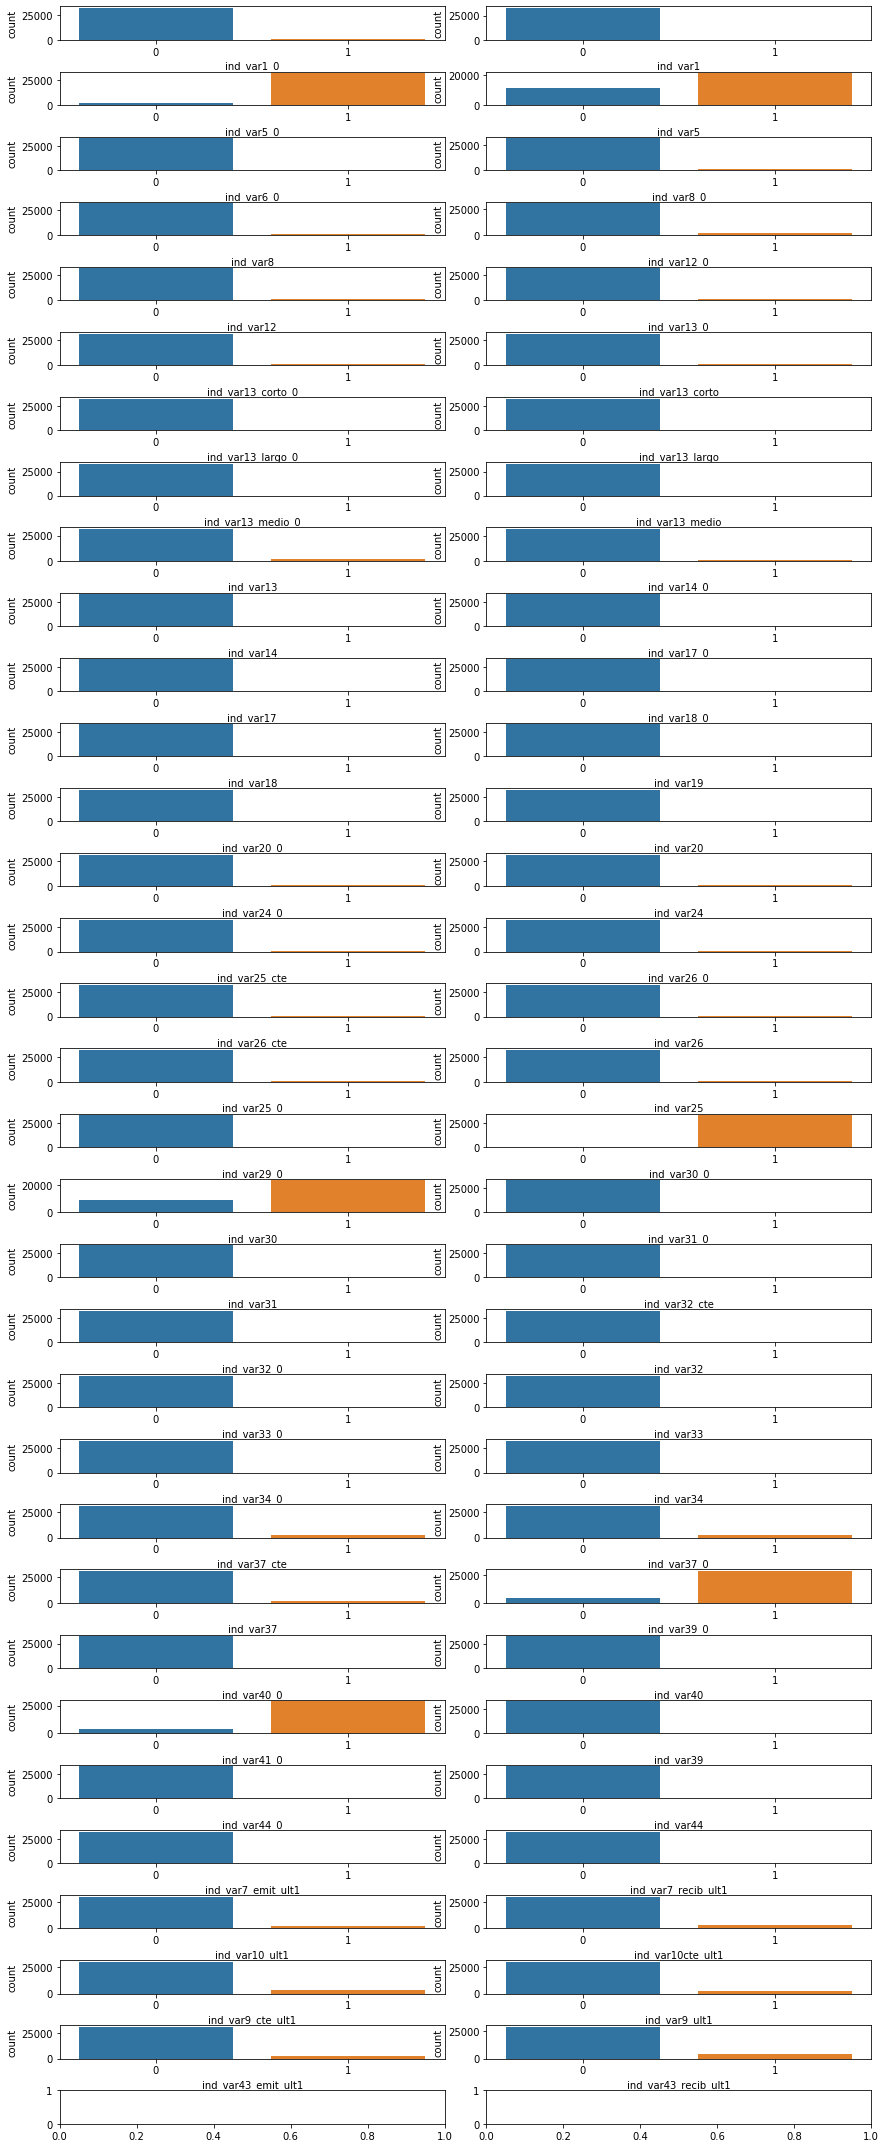

In [49]:
# Vuelvo a visualizar las cantidades para cada categoria

axes_index = [[x,y] for x,y in itertools.product(range(33), range(2))]                              # Creo un vector para guardar las posiciones en la matriz de ejes mas abajo
fig, axes = plt.subplots(nrows=33, ncols=2, figsize = (12,30))                                      # Creo un subplot con la cantidad de variables de tipo imp
plt.tight_layout()                                                                                  # Para que se encuentren distribuidos de forma pareja
for i in range(0,len(in_columns)):
    sns.countplot(df[in_columns[i]], ax = axes[axes_index[i][0],axes_index[i][1]])

## Distribución de las variables de tipo *'delta'*

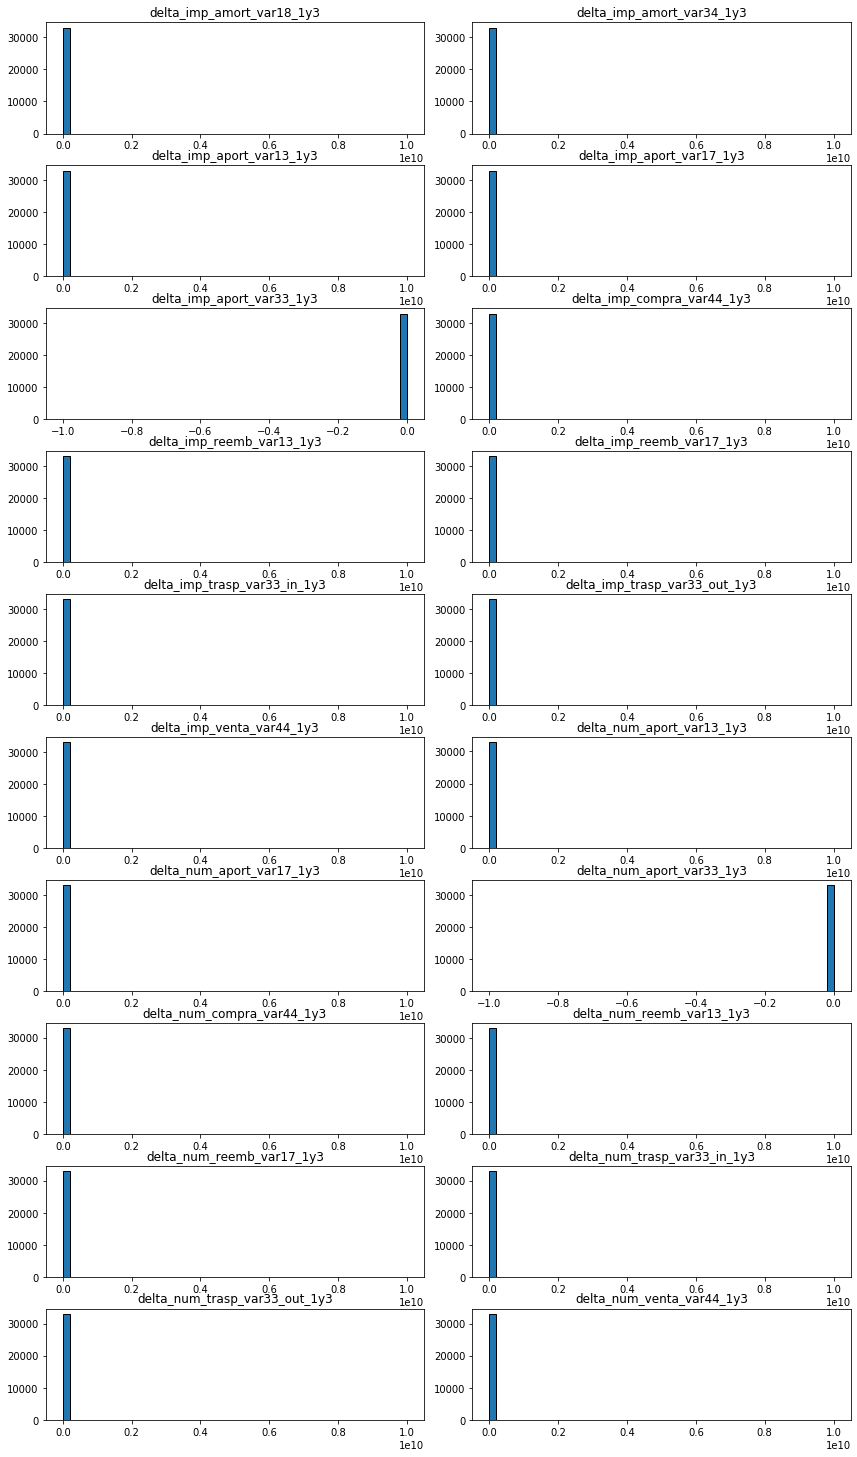

In [50]:
# Creo un vector para guardar las posiciones en la matriz de ejes mas abajo
axes_index = [[x,y] for x,y in itertools.product(range(10), range(2))]
# Creo un subplot con la cantidad de variables de tipo imp
fig, axes = plt.subplots(nrows=10, ncols=2, figsize = (12,20))
# Para que se encuentren distribuidos de forma pareja
plt.tight_layout()
for i in range(0,len(delta_columns)):
    axes[axes_index[i][0],axes_index[i][1]].hist(df[delta_columns[i]], 
                                                 bins = 50, edgecolor = 'black', 
                                                 linewidth = 1.0)
    axes[axes_index[i][0],axes_index[i][1]].set_title(delta_columns[i])

Viendo los gráficos, casi pareciera que estas variables (las que tienen prefijo *delta*) son categóricas, con valores entre 0 y 1. Para verificarlo nos fijamos los valores que toman estas variables.

In [51]:
# Nos fijamos los valore que toma cada una de las variables de prefijo 'delta'
for col in delta_columns:
    print(col)
    print((df[col].value_counts()/df.shape[0])*100)

delta_imp_amort_var18_1y3
0             99.993941
9999999999     0.006059
Name: delta_imp_amort_var18_1y3, dtype: float64
delta_imp_amort_var34_1y3
0             99.99697
9999999999     0.00303
Name: delta_imp_amort_var34_1y3, dtype: float64
delta_imp_aport_var13_1y3
 0.000000e+00    97.518783
-1.000000e+00     1.987397
 1.000000e+10     0.463524
 4.000000e+00     0.006059
 1.605039e-01     0.003030
-8.333333e-01     0.003030
-1.973684e-01     0.003030
 2.333092e+00     0.003030
-7.602877e-01     0.003030
 4.000000e-01     0.003030
-6.666667e-01     0.003030
 1.777778e+00     0.003030
Name: delta_imp_aport_var13_1y3, dtype: float64
delta_imp_aport_var17_1y3
 0.000000e+00    99.930320
 1.000000e+10     0.051503
-1.000000e+00     0.012118
-7.500000e-01     0.003030
 1.500000e+00     0.003030
Name: delta_imp_aport_var17_1y3, dtype: float64
delta_imp_aport_var33_1y3
 0.000000    99.981823
-1.000000     0.015148
-0.940476     0.003030
Name: delta_imp_aport_var33_1y3, dtype: float64
delta_im

En todos los casos, la variable toma el valor 0 al menos el 95% de las veces. Esto parece indicar que casi no existe variabilidad en ninguna de estas variables. La otra alternativa es que los valores extremos sean *outliers*.

## Correlación entre variables

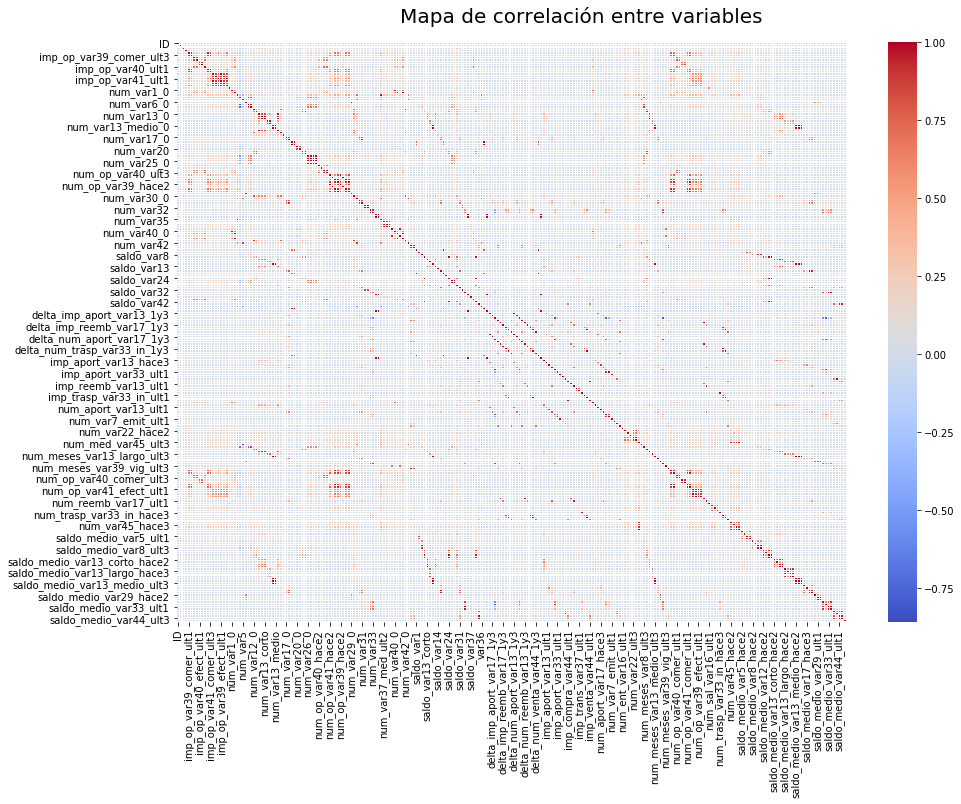

In [52]:
# Correlation Matrix Heatmap

f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Mapa de correlación entre variables', fontsize=20)

Evidentemente son muchas variables como para poder obtener alguna conclusión relevante de esta matriz de correlación. Sin embargo, se puede ver que algunas variables tienen niveles de correlación bastante elevados. Vamos a implementar una función para obtener las duplas de variables que tengan ciertos niveles de correlación.

## Obtengo las duplas de variables más correlacionadas

In [98]:
corr_matrix = pd.DataFrame(df.corr())

# Creo una lista con todas las duplas posibles
duplets = [p for p in itertools.combinations(corr_matrix.columns, 2)]

corr_matrix['var_1'] = corr_matrix.index
corr_matrix = corr_matrix.melt(id_vars='var_1')

# Creo una columna con las duplas de variables
corr_matrix['duplets'] = list(zip(corr_matrix['var_1'],corr_matrix['variable']))

# Creo una columna flag que indica si la dupla esta en el listado de duplas posibles anteriormente
# generado (esto se hace porque la matriz de correlación es simétrica, por lo que hay que reducirla
# a la mitad)
corr_matrix['flag'] = [1 if x in duplets else 0 for x in corr_matrix['duplets']]
# Me quedo con una sola de las duplas
corr_matrix = corr_matrix.loc[corr_matrix['flag'] == 1]   

In [117]:
corr_matrix.sort_values(by = 'value', ascending = False)

,var_1,variable,value,duplets,flag
28265,saldo_var34,delta_imp_amort_var34_1y3,1.000000,"(saldo_var34, delta_imp_amort_var34_1y3)",1
48046,delta_num_reemb_var13_1y3,num_reemb_var13_ult1,1.000000,"(delta_num_reemb_var13_1y3, num_reemb_var13_ult1)",1
48037,delta_imp_reemb_var13_1y3,num_reemb_var13_ult1,1.000000,"(delta_imp_reemb_var13_1y3, num_reemb_var13_ult1)",1
26503,num_var34,saldo_var34,1.000000,"(num_var34, saldo_var34)",1
26502,num_var34_0,saldo_var34,1.000000,"(num_var34_0, saldo_var34)",1
...,...,...,...,...,...
39143,delta_imp_aport_var33_1y3,num_aport_var33_hace3,-0.788168,"(delta_imp_aport_var33_1y3, num_aport_var33_ha...",1
44330,delta_imp_aport_var33_1y3,num_meses_var33_ult3,-0.801547,"(delta_imp_aport_var33_1y3, num_meses_var33_ult3)",1
6445,num_var5_0,num_var8_0,-0.830056,"(num_var5_0, num_var8_0)",1
34459,delta_num_aport_var33_1y3,imp_aport_var33_hace3,-0.835212,"(delta_num_aport_var33_1y3, imp_aport_var33_ha...",1


### Data cleaning

Nos fijamos las cantidades de valores faltantes y outliers en los datos para poder tratarlos posteriormente.

In [53]:
# Busco valores NAs
df.isna().sum()

ID                          0
nac                        56
age                         0
imp_ent_var16_ult1          0
imp_op_var39_comer_ult1     0
                           ..
saldo_medio_var44_hace3     0
saldo_medio_var44_ult1      0
saldo_medio_var44_ult3      0
var38                       0
TARGET                      0
Length: 312, dtype: int64

No parece haber grandes cantidades de valores nulos, lo verificamos

In [54]:
sum_nans = 0
for col in df.columns:
    sum_nans = sum_nans + df[col].isna().sum()
    
print('Total de valores nulos:', sum_nans)

Total de valores nulos: 56


Evidentemente la única variable con valores *NA* es *'nac'*, e incluso son pocos valores. Podrían eliminarse estos registros, evitando la imputación de valores, cosa que podría introducir algun tipo de error.

In [55]:
# Elimino los valores nulos de las columnas correspondientes
df = df.dropna(subset = ['nac'])

In [65]:
# Reseteo el indice
df.reset_index(drop = True, inplace = True)

### Tratamiento de Outliers

Vamos a usar dos métodos para detectar y eventualmente eliminar valores extremos:

* Método Z-Score
* Método IQR

#### Método IQR

In [81]:
# Me quedo con las variables que es considerable que tengan outliers 
df_iqr = df.drop(columns = ['ID','TARGET'], axis = 1)
df_iqr = df_iqr.select_dtypes(exclude = ['category'])

In [100]:
# Calculo el IQR para todas las variables
columns = []
size = []
for col in df_iqr.columns:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    columns.append(col)
    size.append(len(df_iqr[~((df_iqr[col] < (Q1 - 1.5*IQR)) | (df_iqr[col] > (Q3 + 1.5*IQR)))]))

In [113]:
sorted(size)

[25951,
 26136,
 26230,
 26478,
 26798,
 26813,
 26863,
 26908,
 27119,
 27386,
 27393,
 27716,
 27743,
 27743,
 27792,
 27792,
 27793,
 27793,
 27856,
 27856,
 27933,
 28064,
 28064,
 28074,
 28199,
 28241,
 28287,
 28558,
 28558,
 28621,
 28621,
 28690,
 28690,
 28814,
 29074,
 29074,
 29081,
 29081,
 29277,
 29304,
 29467,
 29683,
 29966,
 29966,
 29972,
 29972,
 30138,
 30188,
 30453,
 30563,
 30765,
 30765,
 30770,
 30770,
 30770,
 30797,
 31276,
 31330,
 31330,
 31353,
 31381,
 31381,
 31406,
 31492,
 31496,
 31496,
 31503,
 31503,
 31617,
 31618,
 31619,
 31639,
 31639,
 31648,
 31648,
 31671,
 31732,
 31752,
 31752,
 31754,
 31909,
 31920,
 31920,
 31930,
 31930,
 31958,
 32089,
 32089,
 32089,
 32125,
 32125,
 32125,
 32133,
 32140,
 32193,
 32231,
 32253,
 32286,
 32286,
 32332,
 32390,
 32402,
 32536,
 32538,
 32587,
 32589,
 32589,
 32671,
 32674,
 32674,
 32735,
 32751,
 32752,
 32752,
 32772,
 32780,
 32780,
 32789,
 32789,
 32790,
 32790,
 32804,
 32811,
 32811,
 32815,


In [84]:
df_iqr.shape

(32952, 246)

## Train, test split

In [10]:
from functions import *

Using TensorFlow backend.


In [11]:
# Cambio el nombre de la variable target para poder usarlo en las funciones definidas
df.rename(columns={'TARGET':'target'}, inplace = True)
# Separo en conjunto de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split_func(df)

Verifico que se mantengan las proporciones de la variable target en ambos conjuntos

In [14]:
(y_train.value_counts()/y_train.shape[0])*100

0    90.820268
1     9.179732
Name: target, dtype: float64

In [15]:
(y_test.value_counts()/y_test.shape[0])*100

0    91.154196
1     8.845804
Name: target, dtype: float64